# Explorative Datenanalyse (EDA)

# Umgang mit Daten

In [1]:
# Importieren eines Datensatzes aus einer Machine Learning library
from sklearn.datasets import load_iris  

## 1. Datensatz: Iris (dt. Schwertlilien)

<div align="center" style="display: flex; justify-content: space-around;">
  <div>
    <p style="text-align: center;">Iris Versicolor</p>
    <img src="_img/02_iris_versicolor.jpg" alt="Iris Versicolor">
  </div>
  <div>
    <p style="text-align: center;">Iris Virginica</p>
    <img src="_img/02_iris_virginica.jpg" alt="Iris Virginica">
  </div>
  <div>
  <p style="text-align: center;">Iris Setosa</p>
  <img src="_img/02_iris_setosa.jpg" alt="Iris Setosa" >
  </div>
</div>

Der Datensatz beinhaltet jeweils 50 Messungen zu den drei jeweiligen Arten der Schwertlilie.

Die Messungen beinhalten jeweils die Länge und Breite der Haupt- und Nebenblüten. 

### Laden des Datensatzes

In [2]:
iris_dataset = load_iris(as_frame=True)

### Datensatz ist in einer `dictionary`-artigen Form

mittels `dictionary.keys()` können uns wir alle jeweiligen Schlüsselwörter anschauen unter denen Daten gespeichert sind

In [3]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### `"DESCR"` = Beschreibung

In [4]:
print(iris_dataset["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

### Speichern der Daten

Wir speichern die eigentlichen Daten als `pandas.DataFrame` Objekt.

`pandas` ist eine sehr mächtige library zur Datenverarbeitung und Analyse. 
Sie implementiert tabellenartige `DataFrame` Objekte.

In [5]:
# Library zur Tabellenmanipulation
import pandas as pd 

df_iris = iris_dataset["frame"]
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Wir sehen 5 Spalten in der Tabelle.
- Sepal Length (cm) -- Länge der Hauptblüte
- Sepal Width (cm) -- Breite der Hauptblüte
- Petal Length (cm) -- Länge der Nebenblüte
- Petal Width (cm) -- Breite der Nebenblüte
- target -- jeweilige Klasse

Die Klassen sind demnach, der Reihenfolge nach die folgenden:

In [6]:
iris_dataset["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Pandas erlaubt es Methoden auf Tabularen Daten auszuführen.

> Mit `pd.DataFrame.mean()` können wir den Durchschnitt für jede Spalte berechnen.

In [7]:
df_iris.mean()

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
target               1.000000
dtype: float64

Das Ergebnis ist aber weniger sinnvoll, da es alle Daten beschreibt und sie nicht nach den jeweiligen Klassen (Lilienarten) teilt.

> Mittels `pd.DataFrame.groupby( column )` können wir die Tabelle nach einzigartigen Einträgen einer Spalte gruppieren.

In [8]:
df_iris.groupby("target").mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


Was sehen wir dank des Durchschnitts?

# Visualisierung

Wir Menschen sind relativ schlecht darin numerische Daten auszuwerten.

Jedoch haben wir ein sehr gutes visuelles Verständnis. 

### Anscombes Quartet

Die folgenden vier Datensätze sind identisch in den gebräuchlichen deskriptiven Statistiken (Durschschnitt, Median, Standardabweichung, ...).

Die Visualisierung verrät aber die wahre Verteilung.

| Datensatz I |         | Datensatz II |         | Datensatz III |         | Datensatz IV |         |
|-----------|---------|------------|---------|-------------|---------|------------|---------|
| x         | y       | x          | y       | x           | y       | x          | y       |
| 10.0      | 8.04    | 10.0       | 9.14    | 10.0        | 7.46    | 8.0        | 6.58    |
| 8.0       | 6.95    | 8.0        | 8.14    | 8.0         | 6.77    | 8.0        | 5.76    |
| 13.0      | 7.58    | 13.0       | 8.74    | 13.0        | 12.74   | 8.0        | 7.71    |
| 9.0       | 8.81    | 9.0        | 8.77    | 9.0         | 7.11    | 8.0        | 8.84    |
| 11.0      | 8.33    | 11.0       | 9.26    | 11.0        | 7.81    | 8.0        | 8.47    |
| 14.0      | 9.96    | 14.0       | 8.10    | 14.0        | 8.84    | 8.0        | 7.04    |
| 6.0       | 7.24    | 6.0        | 6.13    | 6.0         | 6.08    | 8.0        | 5.25    |
| 4.0       | 4.26    | 4.0        | 3.10    | 4.0         | 5.39    | 19.0       | 12.50   |
| 12.0      | 10.84   | 12.0       | 9.13    | 12.0        | 8.15    | 8.0        | 5.56    |
| 7.0       | 4.82    | 7.0        | 7.26    | 7.0         | 6.42    | 8.0        | 7.91    |
| 5.0       | 5.68    | 5.0        | 4.74    | 5.0         | 5.73    | 8.0        | 6.89    |

![](./_img/2_ancombes_quartet.png)

### Minards Karte

Visualisierungen können selbstverständlich wesentlich komplexer im Informationsgehalt sein, durch geschickte Methoden ist aber eine Kontextualisierung der einzelnen Daten möglich.

Ein bekanntes Beispiel dafür ist die Karte von Charles Joseph Minard (1781 - 1870) von Napoleans Russlandfeldzug. Dort werden recht viele Variablen auf einer zweidimensionalen Grafik dargestellt.
- Kartendarstellung inklusive bedeutender Städte und Flüsse
- Breiten geben die Armeestärke an
- Farbe: Hin- bzw. Rückzug
- Temperaturen unten in der Grafik

![](./_img/02_minard.png)

## Plotting

Plotting beschreibt das Erstellen von Grafiken.

Meist ist es für uns Menschen wesentlich intuitiver sich Daten grafisch darzustellen.

Im Python-Universum stechen insbesondere folgende beiden libraries hervor:

### [Matplotlib](https://matplotlib.org/stable/gallery/index.html)

- Bietet eine "Low-Level" Schnittstelle
- Heißt man hat viel Kontrolle über die Funktionalitäten
- Leicht damit einfache Plots zu generieren
- Harte Plots sind möglich da man alles selber anpassen kann


In [9]:
from matplotlib import pyplot as plt

> Mit `plt.plot(x,y)` können wir Linienplots erstellen

> Mit `plt.scatter(x,y)` können wir Punkte zeichnen ohne diese mit einer Linie zu verbinden  

Text(0.5, 1.0, 'Verteilung der Hauptblütengrößen zwischen den Klassen')

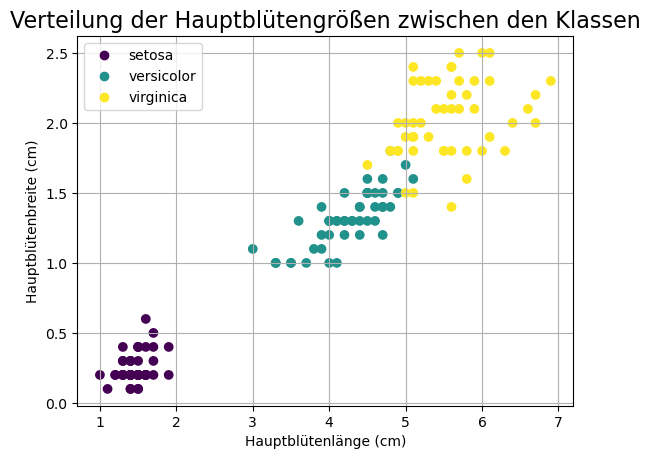

In [10]:
# Bild erstellen
# fig = Bild
# ax = Zeichnungen - Hinweis: wir können mehrere innerhalb eines Bildes haben
fig, ax = plt.subplots()

# Punkte zeichnen
plot = ax.scatter(
    x = df_iris["petal length (cm)"], # petal length Spalte auf x-Achse
    y = df_iris["petal width (cm)"], # petal width Spalte auf y-Achse
    c = df_iris["target"], # Klasse bestimmt Farbe
)

# Legende mit richtigen Namen statt Zahlen
ax.legend(plot.legend_elements()[0], iris_dataset["target_names"])

# Achsenbeschriftung
ax.set_xlabel("Hauptblütenlänge (cm)")
ax.set_ylabel("Hauptblütenbreite (cm)")

# Kästchen zeichnen
ax.grid()

# Titel
ax.set_title("Verteilung der Hauptblütengrößen zwischen den Klassen", size=16)

Was können wir dem Plot entnehmen?

Das gleiche für die Nebenblüte

Text(0.5, 1.0, 'Verteilung der Hauptblütengrößen zwischen den Klassen')

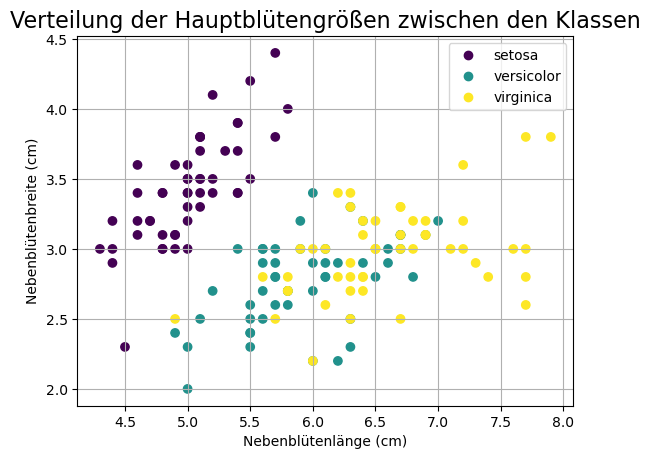

In [14]:
# Bild erstellen
# fig = Bild
# ax = Zeichnungen - Hinweis: wir können mehrere innerhalb eines Bildes haben
fig, ax = plt.subplots()

# Punkte zeichnen
plot = ax.scatter(
    # TODO
)

# Legende mit richtigen Namen statt Zahlen
ax.legend(plot.legend_elements()[0], iris_dataset["target_names"])

# Achsenbeschriftung
ax.set_xlabel("Nebenblütenlänge (cm)")
ax.set_ylabel("Nebenblütenbreite (cm)")

# Kästchen zeichnen
ax.grid()

# Titel
ax.set_title("Verteilung der Hauptblütengrößen zwischen den Klassen", size=16)


### [Seaborn](https://seaborn.pydata.org/examples/index.html)

- Seaborn baut selbst auf Matplotlib auf
- Erlaubt es komplizierte Plots mit einfachen Funktionen zu erstellen

In [12]:
import seaborn as sns

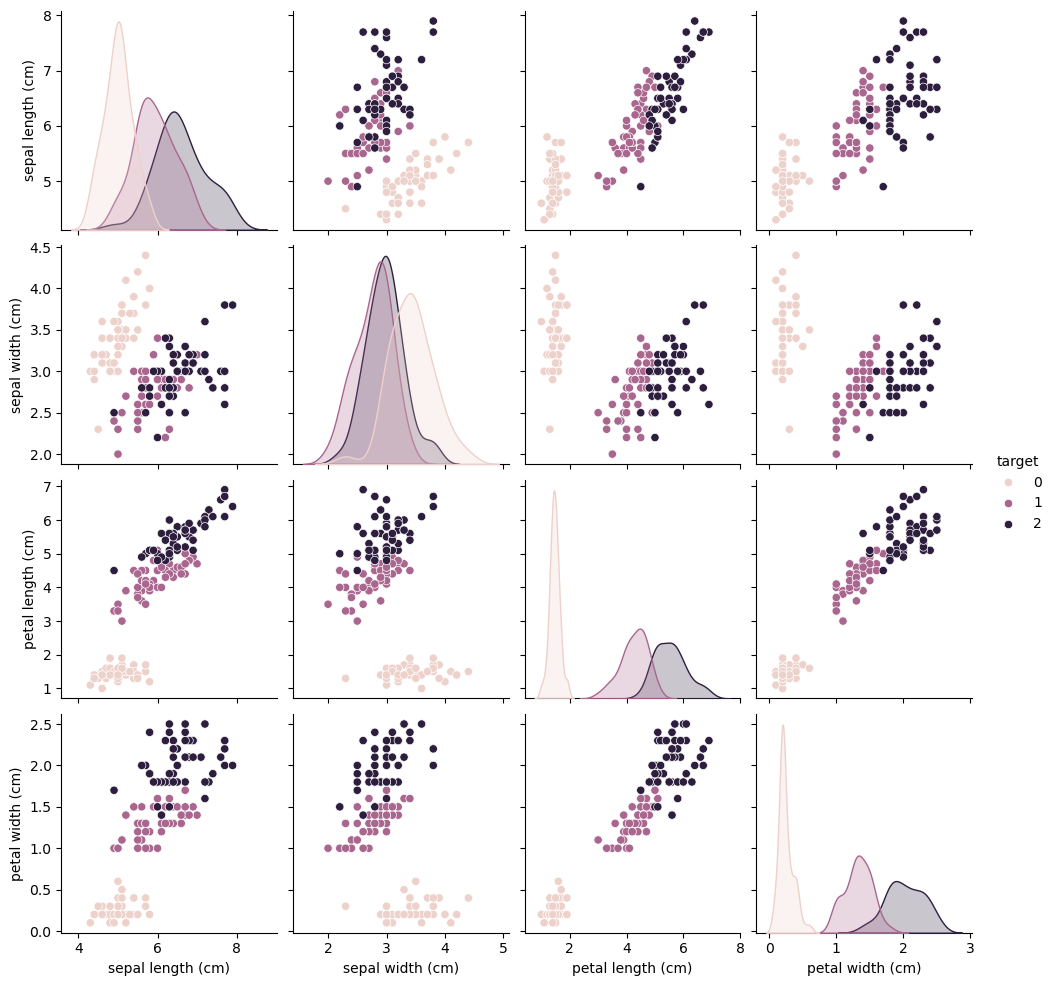

In [13]:
sns.pairplot(df_iris, hue="target")